<a href="https://colab.research.google.com/github/hernandezhdd/Mecanica_Estadistica/blob/main/Simulaciones/Zipf_y_Entropia_Cartas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('seaborn')

from scipy import stats as stats

# Zipf's distribution from stochastic process

<br>

### 0. Who is Zipf?

<br>

<img src = "https://upload.wikimedia.org/wikipedia/commons/c/c6/George_Kingsley_Zipf_1917.jpg" width=120px/>

<br>

* **George Kingsley Zipf** (/ˈzɪf/;[1] 1902–1950), was an American linguist and philologist who studied statistical occurrences in different languages.
<br>
<br>
(source: https://en.wikipedia.org/wiki/George_Kingsley_Zipf)

<br>

### 1. What is Zipf's distribution?

* **Zipf's law**:
<br>
<br>
*"Zipf's law states that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table."* 
<br>
<br>
(source: https://en.wikipedia.org/wiki/Zipf%27s_law)

<br>

* **Zipf's distribution** (or statistic) is a discrete power law probability distribution which is well approximated (on a log-log scale) by a straight line with a slope around −1
<br>
<br>
(https://en.wikipedia.org/wiki/Zipf%27s_law)

<br>

### 2. Critique of Zipf's Law as an indicator of semantic structure

In Ryuji Suzuki, John R.Buck, Peter L.Tyack (2004) "The use of Zipf's law in animal communication analysis" authors state that:

*"(...) a stochastic process devoid of semantic or communicative content may still satisfy Zipf's law"* 

<br>

### 3. The goal of this notebook

This notebook is an attempt to replicate a production of Zipf distribution using stochastic process. It is based on dice example proposed by Suzuki et al. (2004) inspired by another analysis by Li (1992).

<br>

### 4. Let's go! 

* First, let's define a dice to roll:

In [2]:
dice = np.arange(1,7)                              # Define a dice

* Now we ready to dive deeper!

According to Suzuki et al. the procedure goes as follows:

*"We roll a fair cubic die repeatedly. We treat the number resulting from each roll as a letter, which we write down after each roll. We arbitrarily choose 6 to represent a space forming the break between successive words."*

In [3]:
utterance = np.zeros(100000)                        # Create an empty array

* Let's roll!

In [4]:
size = 100000
utterance = np.random.randint(1, high=7, size=size, dtype=int)

# for i in range(10000):                             # Roll a dice 10000 times
#     utterance[i] = np.random.choice(dice)          # ...and save the result

* Now, let's construct the utterance, and then clean it a bit

In [5]:
utterance = ''.join(map(str,map(int,utterance)))   # Join the letters to cnstrct the utterance

In [6]:
# Split the words (whitespace symbolized by '6')
utterance = utterance.split('6')

In [7]:
# Filter-out whitespaces
words = np.array(list(filter(lambda x: len(x) > 0, utterance)))

* Let's count occurences of unique words and their frequencies

In [8]:
# Count unique words and their frequencies
labels, values = np.unique(words, return_counts=True)

values = np.array(values) / len(words)

* BTW: are lengths and frequencies of the words correlated as assumed by the least effort principle?
(https://en.wikipedia.org/wiki/Principle_of_least_effort)

In [9]:
# Compute word lengths
lenghts = [len(x) for x in labels]

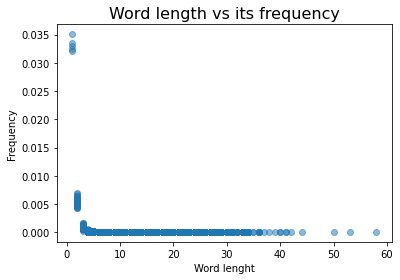

In [10]:
# Plot lenghts vs frequencies
plt.scatter(lenghts, values, alpha=.5)
plt.xlabel('Word lenght')
plt.ylabel('Frequency')
plt.title('Word length vs its frequency', fontsize=16)
plt.show()

In [11]:
# It seems that there could be a linear relation between logs of length and frequency
# Let's find out!
log_values = np.log(values)
log_lenghts = np.log(np.array(lenghts))

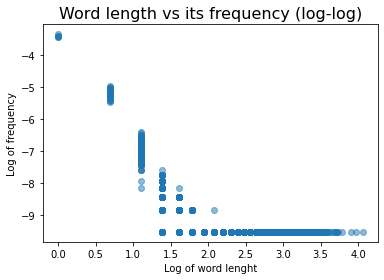

In [12]:
plt.scatter(log_lenghts, log_values, alpha=.5)
plt.xlabel('Log of word lenght')
plt.ylabel('Log of frequency')
plt.title('Word length vs its frequency (log-log)', fontsize=16)
plt.show()

In [13]:
# Let's compute Spearman's r
prsn = stats.spearmanr(log_values, log_lenghts)
print("Correlation between log of word lenth and log of its frequency\n\
\nSpearman's r: {:.3f}\np-value: {:.3f}".format(prsn[0], prsn[1]))

Correlation between log of word lenth and log of its frequency

Spearman's r: -0.490
p-value: 0.000


* Word lenght and its frequency are definitely correlated!

<br>

* Now let's sort the values according to their frequencies:

In [14]:
# Sort the values from the most frequent to the least frequent
indexes_sorted = np.argsort(values)[::-1]      

In [15]:
# Rearrange the data
labels = np.array(labels)[indexes_sorted]
values = np.array(values)[indexes_sorted]

# Produce indexes
indexes = np.arange(len(labels))

* Some more theory and we're ready to plot!

*"Zipf (1949) observed that, for many human languages, a plot of the frequency of words against the rank of occurrence on doubly logarithmic axes (log frequency versus log rank) is well approximated by a straight line with a slope around −1"* (Suzuki et al., 2005)

<br>

* As further proposed by Suzuki et al. (2005):

*"Our straight line fitting the rank–frequency data is in the form:*

<br> 
$$p(r) = cr^{\alpha}$$

*where (...):*
<br>

$$\alpha = -\frac{log6}{log5}$$

*and*

$$c = \frac{1}{\sum_{r=1}^{\infty}r^{-\frac{log6}{log5}}}$$

*(...)*

*In this expression, we see that α, the power of the rank, is −log 6/log 5, which is approximately −1.11. This α will be the slope when the data are plotted on doubly logarithmic axes"* (Suzuki et al., 2005)

<br>

* Let's recreate this!

In [16]:
# Produce theoretical line fit
line_x = np.arange(1,len(values))

alpha = (-np.log(6) / np.log(5))

line_y = (1 / sum(line_x**alpha)) * line_x**alpha

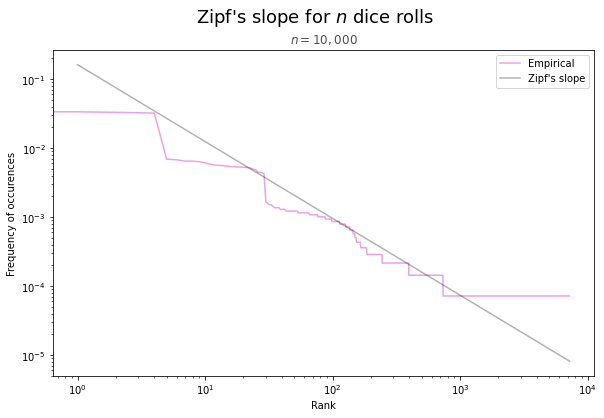

In [17]:
# Visualize
plt.figure(figsize=(9.7, 6))
plt.plot(indexes, values, alpha=.5, label='Empirical', color="#db43ce")
plt.plot(line_x, line_y, color='black', alpha=.3, label="Zipf's slope")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Rank")
plt.ylabel('Frequency of occurences')
plt.suptitle("Zipf's slope for $n$ dice rolls", fontsize='18')
plt.title("$n = 10,000$", alpha=.7)
plt.legend()
plt.show()

* So, what do you think? How does the plot look for you?

### 5. References

* Li, W. (1992). Random Texts Exhibit Zipfs-Law-Like Word Frequency Distribution. IEEE Transactions on Information Theory, 38(6), 1842–1845. https://doi.org/10.1109/18.165464

* Suzuki, R., Buck, J. R., & Tyack, P. L. (2005). The use of Zipf’s law in animal communication analysis. Animal Behaviour, 69(1), F9–F17. https://doi.org/10.1016/j.anbehav.2004.08.004

* Zipf, G. K. (1949). Human Behavior and the Principle of Least Effort. Addisson-Wesley Press, Cambridge, 6(3), 573.

* https://en.wikipedia.org/wiki/Zipf%27s_law

Another interesting perspective on Zipf's Law can be found here:

* McCowan, B., Doyle, L. R., Jenkins, J. M., & Hanser, S. F. (2005). The appropriate use of Zipf’s law in animal communication studies. Animal Behaviour, 69(1), F1–F7. https://doi.org/10.1016/j.anbehav.2004.09.002


### 6. Contact me

I'd love to hear your **comments**!

Feel free to contact me at: aleksander.molak (at) gmail.com

_____________

MIT License, Aleksander Molak, 2018 

# Calculo de la entropia de un mazo de cartas y simulacion de una mezcla de la baraja

In [18]:
cartas = np.arange(1, 41)

# np.random.shuffle(cartas) # inplace=True

cartas

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])

## Voy a seguir el metodo de esta respuesta por @stachyra

https://stats.stackexchange.com/a/79552

In [19]:
DeltaF = np.roll(cartas, -1) - cartas

DeltaF

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
       -39])

In [20]:
(DeltaF<0)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True])

In [21]:
DeltaF = DeltaF + 40*(DeltaF<0)
DeltaF 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
unique, counts = np.unique(DeltaF, return_counts=True)

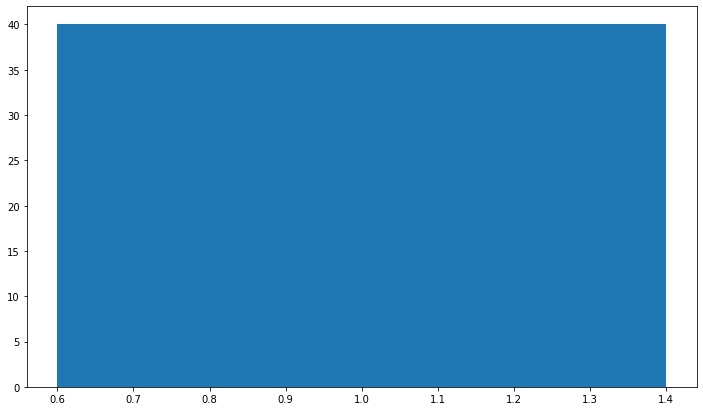

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))

plt.bar(unique, counts)

plt.show()

In [24]:
probs = 1/counts
probs = counts/40

In [25]:
E = np.sum( -probs*np.log(probs) ) #Entropy
E

0.0

## Aca simulo una forma de mezclar las cartas. La de hacer dos montoncitos y mezclarlos.

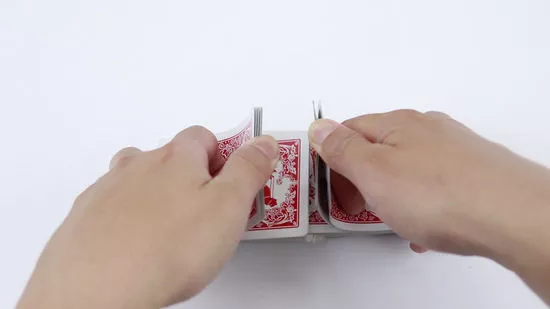

In [26]:
cartas = np.arange(1, 41)

mitad_1 = cartas[0:20]

mitad_2 = cartas[20:40]

cartas_nuevas = []

for i in np.arange(0,20,2):
  temp = np.concatenate( (mitad_1[i:i+2], mitad_2[i:i+2]) )
  np.random.shuffle(temp) # inplace=True
  cartas_nuevas = np.concatenate( (cartas_nuevas, temp) )
  # cartas_nuevas.append(temp)

cartas_nuevas = cartas_nuevas.astype(int)

cartas_nuevas

array([ 1, 22, 21,  2, 24,  3,  4, 23,  5,  6, 25, 26, 28,  7,  8, 27,  9,
       30, 29, 10, 12, 11, 32, 31, 33, 34, 13, 14, 35, 36, 15, 16, 38, 18,
       17, 37, 40, 20, 19, 39])

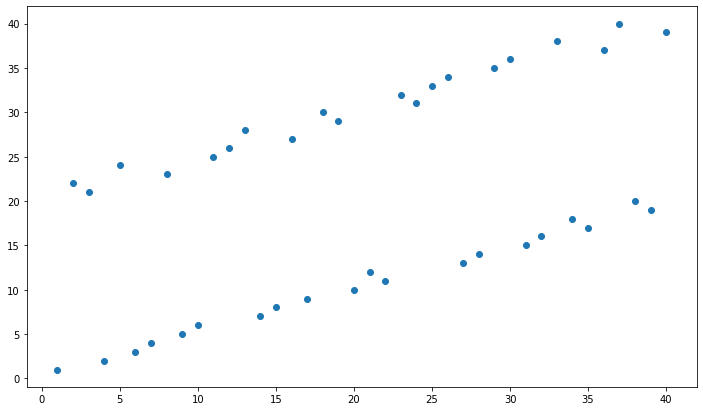

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))

plt.scatter(cartas, cartas_nuevas)

plt.show()

### Genial, el grafico anterior se ve muy similar al segundo de la grilla de @stachyra.

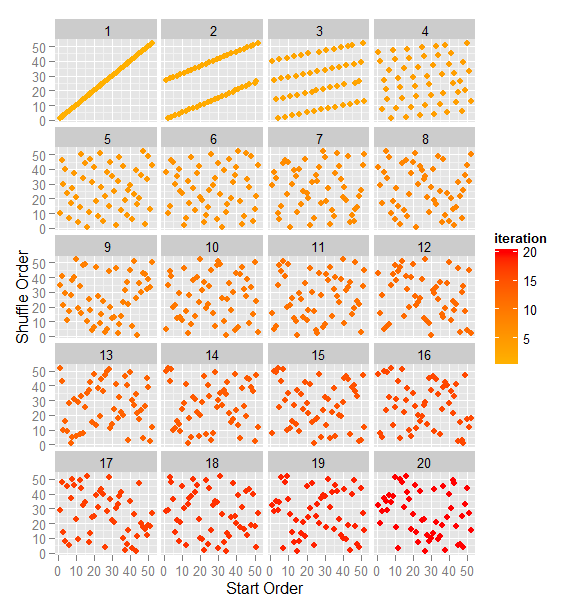

## Voy a crear funciones para mezclar las cartas, y para contar la entropia.

In [28]:
def MezclarCartas(cartas_viejas):

  mitad_1 = cartas_viejas[0:np.ceil(0.5*len(cartas_viejas)).astype(int)]

  mitad_2 = cartas_viejas[np.ceil(0.5*len(cartas_viejas)).astype(int):]

  cartas_nuevas = []

  for i in np.arange(0,len(cartas_viejas),1):
    temp = np.concatenate( (mitad_1[i:i+1], mitad_2[i:i+1]) )
    np.random.shuffle(temp) # inplace=True
    cartas_nuevas = np.concatenate( (cartas_nuevas, temp) )
    # cartas_nuevas.append(temp)

  cartas_nuevas = cartas_nuevas.astype(int)

  return cartas_nuevas

In [29]:
cartas = np.arange(1, 41)
cartas

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])

In [30]:
MezclarCartas(cartas)

array([ 1, 21,  2, 22,  3, 23,  4, 24,  5, 25, 26,  6,  7, 27, 28,  8, 29,
        9, 30, 10, 31, 11, 12, 32, 33, 13, 14, 34, 15, 35, 16, 36, 17, 37,
       38, 18, 19, 39, 20, 40])

In [31]:
def CalcularEntropia(cartas):

  DeltaF = np.roll(cartas, -1) - cartas

  DeltaF = DeltaF + len(cartas)*(DeltaF<0)

  unique, counts = np.unique(DeltaF, return_counts=True)

  probs = counts/len(cartas)

  E = np.sum( -probs*np.log(probs) ) #Entropy
  return E, unique, counts

In [32]:
cartas

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])

In [33]:
ent, unique, counts = CalcularEntropia(cartas)

print('Entropia = ',ent)

Entropia =  0.0


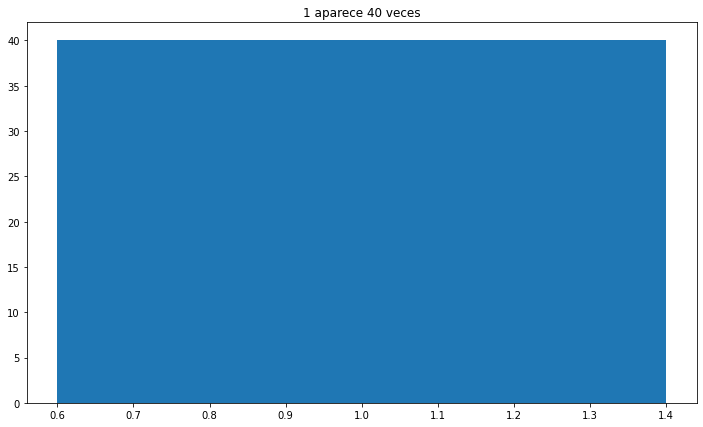

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))

plt.bar(unique, counts)

plt.title('1 aparece 40 veces')

plt.show()

In [35]:
ent, unique, counts = CalcularEntropia( MezclarCartas(cartas) )

print('Entropia = ',ent)

Entropia =  1.0372165874167394


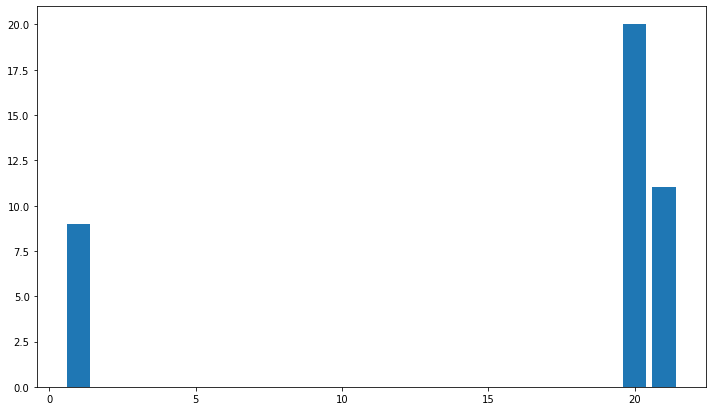

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))

plt.bar(unique, counts)

# plt.title('1 aparece 40 veces')

plt.show()

In [37]:
import pandas as pd

cartas = np.arange(1, 41)

cartas_mezclas = pd.DataFrame(cartas, columns=[0])

cartas_mezclas.head()

,0
0,1
1,2
2,3
3,4
4,5


In [38]:
cartas = MezclarCartas(cartas)

cartas_mezclas[1] = cartas

cartas_mezclas.head()

,0,1
0,1,21
1,2,1
2,3,2
3,4,22
4,5,23


In [91]:
cartas = np.arange(1, 41)

cartas_mezclas = pd.DataFrame(cartas, columns=[0])

for i in range(1,30):

  cartas = MezclarCartas(cartas)

  cartas_mezclas[i] = cartas

cartas_mezclas.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1,1,1,6,6,24,4,10,14,14,...,24,24,24,2,2,20,40,40,40,1
1,2,21,11,1,23,6,24,4,10,12,...,36,5,25,24,33,2,20,9,30,40
2,3,22,31,11,38,23,15,24,34,10,...,11,29,5,25,27,34,14,20,9,30
3,4,2,21,36,1,22,6,28,4,36,...,6,36,8,3,24,33,2,31,23,29
4,5,3,32,31,11,27,23,26,2,35,...,28,11,29,10,19,18,34,14,20,9


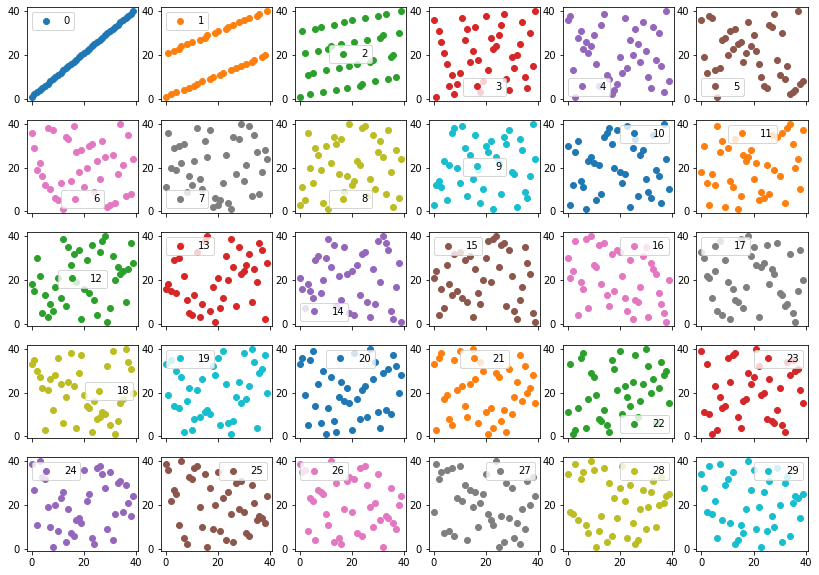

In [40]:
# plt.figure(figsize=(12,7))

cartas_mezclas.plot(figsize=(14,10), subplots=True, layout=(5,6), marker='o', linewidth=0)

plt.show()

In [60]:
CalcularEntropia(cartas_mezclas[0])

(0.0, array([1]), array([40]))

In [ ]:
# np.math.factorial(40)/(np.math.factorial(40))

In [ ]:
# np.log(np.math.factorial(40)/(np.math.factorial(13)*np.math.factorial(20)*np.math.factorial(7)))

In [ ]:
# entropias = []

# for i in range( len( cartas_mezclas.columns )):
#     entropias.append( CalcularEntropia(cartas_mezclas[i])[0] )
#     print(pd.DataFrame(CalcularEntropia(cartas_mezclas[i])).T )
# #     plt.bar( CalcularEntropia(cartas_mezclas[i])[1], CalcularEntropia(cartas_mezclas[i])[2] )

In [ ]:
# pd.DataFrame(CalcularEntropia(cartas_mezclas[i])).T

In [93]:
print('La entropia final del sistema es: ',  entropias[-1])

La entropia final del sistema es:  3.2599099421838558


In [94]:
print('La entropia máxima que podria tener este sistema si cada DeltaF aparece una sola  vez es: ',  np.sum( -np.ones(len(cartas))/len(cartas)*np.log( np.ones(len(cartas))/len(cartas) ) ))

La entropia máxima que podria tener este sistema si cada DeltaF aparece una sola  vez es:  3.6888794541139363


In [95]:
print('La entropia final por carta del sistema es: ',  entropias[-1]/len(cartas))

La entropia final por carta del sistema es:  0.08149774855459639


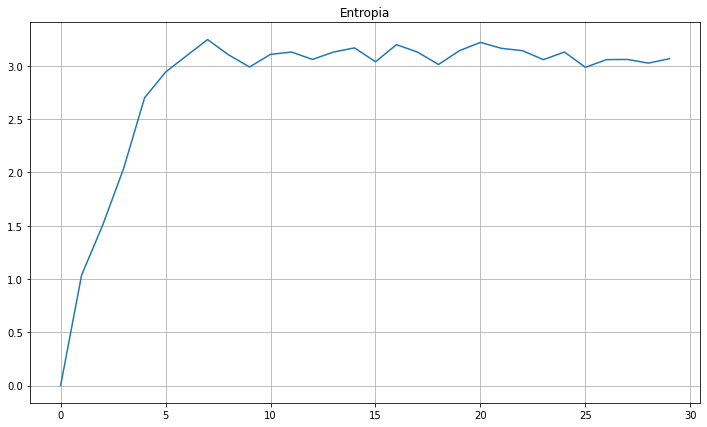

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))

plt.plot(entropias)
plt.grid()
plt.title('Entropia')

plt.show()

# Que pasa si usamos mas cartas?

In [97]:
cartas = np.arange(1, 201)

cartas_mezclas = pd.DataFrame(cartas, columns=[0])

for i in range(1,30):

  cartas = MezclarCartas(cartas)

  cartas_mezclas[i] = cartas

cartas_mezclas.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1,1,1,126,63,157,197,71,36,139,...,19,19,51,51,51,155,161,142,20,20
1,2,101,51,1,126,63,157,197,71,36,...,124,187,19,79,50,51,155,161,142,12
2,3,2,101,176,88,94,63,157,197,45,...,156,31,187,19,79,50,80,155,161,77
3,4,102,151,51,1,126,91,161,156,71,...,138,124,72,200,134,126,51,103,180,142
4,5,103,2,76,113,88,104,90,157,197,...,75,108,16,187,111,121,50,43,88,161


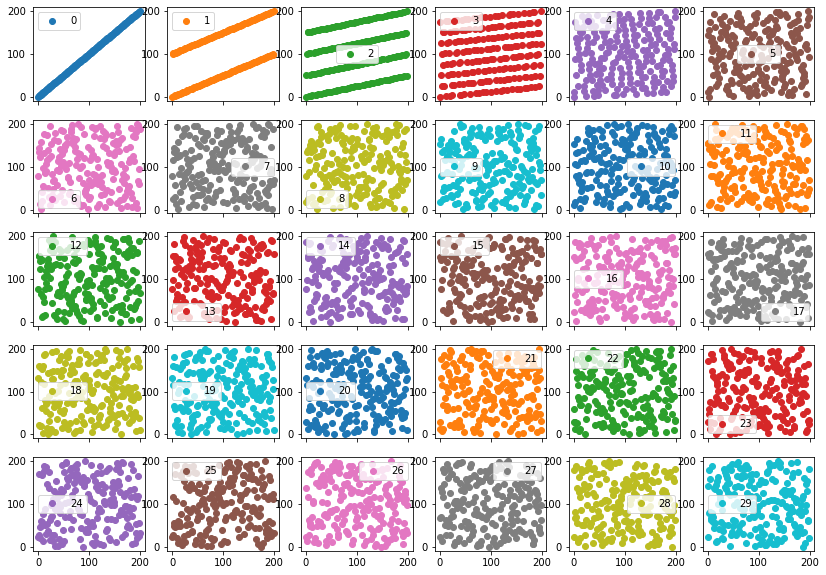

In [50]:
# plt.figure(figsize=(12,7))

cartas_mezclas.plot(figsize=(14,10), subplots=True, layout=(5,6), marker='o', linewidth=0)

plt.show()

In [98]:
entropias = []

for i in range( len( cartas_mezclas.columns )):
  entropias.append( CalcularEntropia(cartas_mezclas[i])[0] )

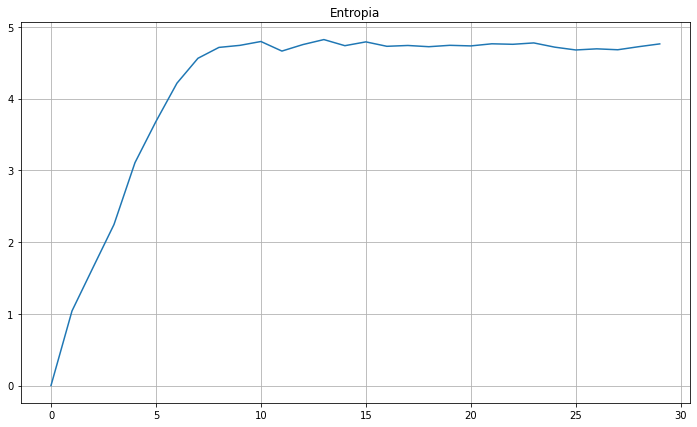

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))

plt.plot(entropias)
plt.grid()
plt.title('Entropia')

plt.show()

In [87]:
print('La entropia final del sistema es: ',  entropias[-1])

La entropia final del sistema es:  4.762277919136148


In [88]:
print('La entropia máxima que podria tener este sistema si cada DeltaF aparece una sola  vez es: ',  np.sum( -np.ones(len(cartas))/len(cartas)*np.log( np.ones(len(cartas))/len(cartas) ) ))

La entropia máxima que podria tener este sistema si cada DeltaF aparece una sola  vez es:  5.298317366548037


In [89]:
print('La entropia final por carta del sistema es: ',  entropias[-1]/len(cartas))

La entropia final por carta del sistema es:  0.02381138959568074


In [99]:
print('La entropia final por carta del sistema es: ',  entropias[-1]/np.log(len(cartas)))

La entropia final por carta del sistema es:  0.8845030435904286


## Pruebo con 10 mil

In [100]:
cartas = np.arange(1, 10001)

cartas_mezclas = pd.DataFrame(cartas, columns=[0])

for i in range(1,30):

  cartas = MezclarCartas(cartas)

  cartas_mezclas[i] = cartas

cartas_mezclas.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1,1,1,1,1,1,1,1,1524,1524,...,9146,9146,4109,3367,1043,6133,6133,4547,6116,6116
1,2,5001,7501,8751,5626,4688,469,8985,1,5762,...,903,3187,9146,4109,3367,1043,5529,6133,4547,5734
2,3,2,5001,7501,1876,2813,782,4141,8985,9473,...,1899,9092,2729,9146,4109,3367,9493,5529,6133,2847
3,4,5002,2501,1251,8751,5626,4688,469,8477,1,...,4696,903,3187,9544,9491,6367,1043,4530,4586,4547
4,5,5003,2502,3751,7501,1876,6407,782,4571,5489,...,5480,1899,3011,2729,9146,4109,7673,9493,5529,6133


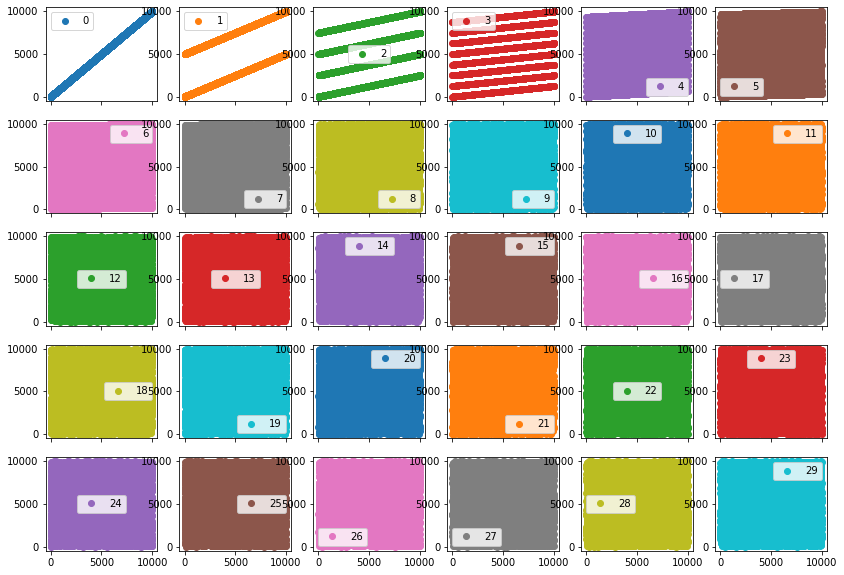

In [54]:
# plt.figure(figsize=(12,7))

cartas_mezclas.plot(figsize=(14,10), subplots=True, layout=(5,6), marker='o', linewidth=0)

plt.show()

In [101]:
entropias = []

for i in range( len( cartas_mezclas.columns )):
  entropias.append( CalcularEntropia(cartas_mezclas[i])[0] )

### Tenemos 10 mil cartas y en 10 mezclas ya alcanzo el valor maximo de entropia. La entropia crece muy rapido. Tambien se ve un pico y una bajada, posiblemente debido a:

*   El mecanismo de mezcla.
*   Un error de programacion.
*   Un error en la forma de calcular la entropia.

### Encontré el error y lo corregi, ahora ya no hay mas un pico. Y se ve como la entropia comienza a ser algo bastante monotonamente creciente.

### Comparo la entropía final con la entropia si cada DeltaF tuviera 1 aparicion:

In [78]:
print('Entropia final: ', entropias[-1])
print('Entropia si cada DeltaF tuviera 1 aparicion: ', np.sum( -np.ones(10000)/10000*np.log( np.ones(10000)/10000 ) ))

Entropia final:  8.632382813958461
Entropia si cada DeltaF tuviera 1 aparicion:  9.21034037197618


In [79]:
print('Entropia final: ', entropias[-1])

Entropia final:  8.632382813958461


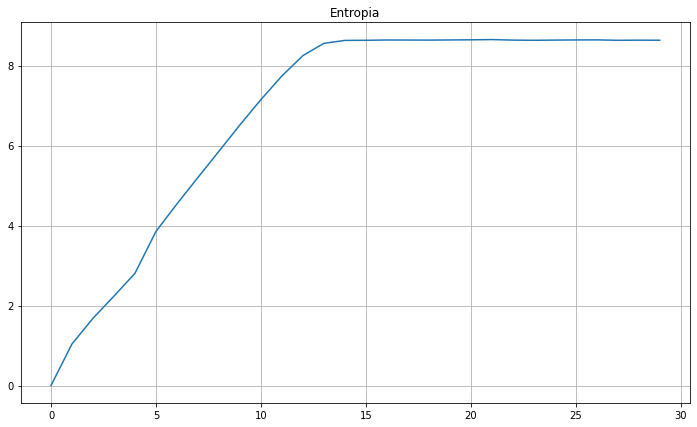

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))

plt.plot(entropias)
plt.grid()
plt.title('Entropia')

plt.show()

In [81]:
print('La entropia final del sistema es: ',  entropias[-1])

La entropia final del sistema es:  8.632382813958461


In [82]:
print('La entropia máxima que podria tener este sistema si cada DeltaF aparece una sola  vez es: ',  np.sum( -np.ones(len(cartas))/len(cartas)*np.log( np.ones(len(cartas))/len(cartas) ) ))

La entropia máxima que podria tener este sistema si cada DeltaF aparece una sola  vez es:  9.21034037197618


In [83]:
print('La entropia final por carta del sistema es: ',  entropias[-1]/len(cartas))

La entropia final por carta del sistema es:  0.0008632382813958461


In [102]:
print('La entropia final del sistema sobre ln(n_cartas) es: ',  entropias[-1]/np.log(len(cartas)))

La entropia final por carta del sistema es:  0.9381099174904859


### Me fijo si es correcto que S/log(N) es constante.

In [112]:
num_cartas = np.arange(2,10)

num_cartas = 3**num_cartas

entropias_eq = []

for n_cartas in num_cartas:

  cartas = np.arange(1, n_cartas)

  cartas_mezclas = pd.DataFrame(cartas, columns=[0])

  for i in range(1,30):

    cartas = MezclarCartas(cartas)

    cartas_mezclas[i] = cartas

  entropias = []

  for j in range( len( cartas_mezclas.columns )):
    entropias.append( CalcularEntropia(cartas_mezclas[j])[0] )

  entropias_eq.append( entropias[-1]/np.log(n_cartas) )

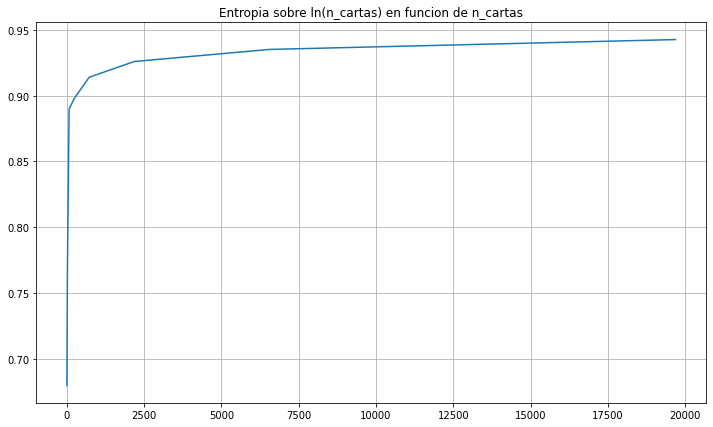

In [114]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))

plt.plot(num_cartas, entropias_eq)
plt.grid()
plt.title('Entropia sobre ln(n_cartas) en funcion de n_cartas')

plt.show()